# Problem Set 1 (20 + 40 + 30 = 90 points)

## Important information
1.  We provide signatures of the functions that you have to implement. Make sure you follow the signatures defined, otherwise your coding solutions will not be graded.

2.  Please submit the single Jupyter Notebook file, where only Python and Markdown/$\LaTeX$ are used. Any hand-written solutions inserted by photos or in any other way **are prohibitive and will not be graded**. If you will have any questions about using Markdown, ask them!
3.  The works will be checked for **plagiarism**. The score will be divided by the number of similar works.

4. Some tasks in this assignment are bonus. It means that you can get maximum score for this assignment even if you ignore these tasks. However, if you get $y$ points for bonus tasks and $x$ points for regular tasks, then your score for the assignment will be $\min(90, x+y)$. If $x + y > 90$, then we will label your submission and take into account in the final grade releasing (e.g. in the border case).

## Problem 1. QR backpropagation (20 pts)

Our goal is to write an orthogonalization layer, that for an arbitrary rectangular matrix $A$ produces an orthonormal matrix $Q$ and (optionally) an upper triangualr matrix $R$ such that $A = QR$. 
In other words, we need to compute the QR decomposition.

There are problems when one need to optimize over orthogonal matrices, so using such layer can be a solution.

A standard algorithm to compute the QR decomposition is the Gram-Schmidt process.
For the linearly independent set of vectors $a_1,\dots,a_n$ (that are defined with the matrix $A$) it computes matrix $Q$ that contains orthonormalized set of vectors $q_1,\dots,q_n$.

This algorithm is listed below.

$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$

Obtained $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to make the system orthonormal you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.

We have $A = QR$. 
Matrix $Q$ consists of vectors $u_1, \dots, u_n$. 
Now let's look at the matrix $R$. 

$Q^*A = R$. 
So $R_{i, j} = (u_i, v_j)$ (assuming $u_i$ is already normalized). 
And it is exactly what we see in Gram-Schmidt algorithm:

$$ v_n = \frac{(v_n, u_1)}{(u_1, u_1)} u_1 + \frac{(v_n, u_2)}{(u_2, u_2)} u_2 + \dots + \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1} + u_n.$$ 

This is the representation of vectors $v_i$ in our newly computed ortonormal basis. 
Thus they form matrix $R$. 
These coefficients are in the upper triangular part of $R$, because when $i>j$ we get $R_{i j} = 0$, because then we get sum of scalar products of orthogonal vectors. 

There is a more [computationally stable version of the Gram-Schmidt algorithm](https://en.wikipedia.org/wiki/Gram–Schmidt_process#Numerical_stability) that reduces the loss of orthogonality in matrix $Q$. 
This algorithm is called the modified Gram-Schmidt algorithm.

The loop of orthogonalization is the same, except for the computing the vector $u_k$ simultaneously:

$$ u_n = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}
u_n$$

$$ 
 = v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1},
$$

one need to iteratively update $u_k$ step-by-step for a better numerical stability.

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$


You are supposed to do the following tasks:

__1.__ (2 points) Implement the modified Gram-Schmidt algorithm in a function ```modified_gram_schmidt(A)``` using PyTorch.

__2.__ (1 point) Create a random matrix $A \in \mathbb{R}^{m \times n}$, $m \gg n$. For the arbitrary loss function, eg. $L(Q) = \sum_{i=0}^{m-1}\sum_{j=0}^{n-1} q_{ij}$, compute the gradient $\frac{\partial L}{\partial Q}$. Finally, compute $\frac{\partial L}{\partial A}$ using built-in PyTorch backpropagation through your implementation of QR decomposition (```modified_gram_schmidt(A)```).

__3.__ (2 points) Compute gradient $\frac{\partial L}{\partial A}$ using backpropagation through built-in PyTorch function for computing QR decomposition.

In [1]:
# install dependencies
!pip install memory-profiler
import torch

In [2]:
def modified_gram_schmidt(A):
    """
    Computes QR decomposition of matrix A
    
    Input: 
        A - n x m matrix
    Output:
        Q - n x m orthonormal matrix
        R - m x m upper triangular matrix
    """
    # Your code here
    n = A.shape[1]
    u_ls = []
    
    for i in range(n):
        u = A[:,i]
        for k in range(i):
            u = u - torch.dot(u_ls[k].reshape(-1), u)*u_ls[k].reshape(-1)
        
        u = u / torch.linalg.norm(u) # Calculate the i-th orthonormal vector
        u_ls.append(u.reshape(-1,1))
        
    Q = torch.cat(u_ls, dim=1)
    R = torch.matmul(Q.T, A)
    
    return Q, R

m = 100
n = 20
A = torch.rand((m, n), requires_grad=True)

# Your code is below
Q1, R1 = torch.linalg.qr(A) # torch version
Q2, R2 = modified_gram_schmidt(A) # modified_gram_schmidt

# TODO compute gradients
print("\nTorch Backpropagation:\n")
loss1 = Q1.sum()
Q1.retain_grad()
loss1.backward()
print(f'dL1/dA: {A.grad}')
A.grad.zero_()

print("\nOur Backpropagation:\n")
loss2 = Q2.sum()
Q2.retain_grad()
loss2.backward()
print(f'dL2/dA: {A.grad}')


Torch Backpropagation:

dL1/dA: tensor([[-3.0358e-01,  5.2724e-02,  6.4387e-02,  ...,  7.1732e-02,
         -4.0135e-02, -4.4429e-02],
        [ 7.0438e-02,  5.8251e-01,  6.0423e-01,  ...,  5.8812e-02,
         -4.5964e-02, -5.0624e-02],
        [ 2.9526e-01,  1.2213e-01,  4.5373e-02,  ..., -1.1329e-02,
          5.3289e-04,  5.2890e-04],
        ...,
        [ 4.3319e-01,  2.8345e-01,  2.7456e-01,  ...,  7.1040e-02,
         -4.9556e-02, -5.5657e-02],
        [ 3.5243e-01,  1.2142e-01,  2.2526e-02,  ...,  3.9942e-02,
         -6.7136e-03, -6.9390e-03],
        [-3.8232e-01, -1.4199e-02, -1.6249e-02,  ...,  6.4254e-03,
         -2.1884e-02, -2.4473e-02]])

Our Backpropagation:

dL2/dA: tensor([[-1.9812e-01, -3.5028e-02,  9.9786e-03,  ...,  2.8573e-02,
          4.0135e-02,  4.4428e-02],
        [-6.1370e-01, -4.2866e-01, -1.8167e-01,  ...,  4.2558e-02,
          4.5964e-02,  5.0624e-02],
        [ 1.5248e-01,  7.6221e-02,  2.6622e-02,  ...,  4.0159e-03,
         -5.3284e-04, -5.2884e-

In [3]:
Q1, R1 = torch.linalg.qr(A) # torch version
Q2, R2 = modified_gram_schmidt(A) # modified_gram_schmidt

print("\nTorch Backpropagation:\n")
loss1 = Q1.sum()
Q1.retain_grad()
loss1.backward()
print(f'dL1/dQ1: {Q1.grad}')

print("\nOur Backpropagation:\n")
loss2 = Q2.sum()
Q2.retain_grad()
loss2.backward()
print(f'dL2/dQ2: {Q2.grad}')


Torch Backpropagation:

dL1/dQ1: tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

Our Backpropagation:

dL2/dQ2: tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])


__4.__ (13 points total) Write the backpropagation $\frac{\partial L}{\partial A}$ from scratch with PyTorch. Do not forget to use ```requires_grad=False``` to disable PyTorch autograd accumulation of the gradient.

  a) (2 points) Derive analytically the gradient $\frac{\partial y}{\partial x}$ of vector normalization operation $y := x/\|x\|$.

  b) (1 point) Implement backward through the vector normalization operation (can be implemented either in the function ```backward_normalization``` or further inside the code).

  c) (2 points) Derive analytically the gradient $\frac{\partial u_k}{\partial v_j}$ of the othonormalization operation:

$$
\begin{split}
u_k &= v_k - \frac{(v_k, u_1)}{(u_1, u_1)} u_1, \\
u_k &= u_k - \frac{(u_k, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_k &= u_k - \frac{(u_k, u_{k-1})}{(u_{k-1}, u_{k-1})} u_{k-1}. \\
\end{split}
$$

  d) (2 points) Implement backward through the othonormalization operation (can be implemented either in the function ```backward_orthogonalization``` or further inside the code).

  e) (1 point) Implement the QR forward pass (almost identically to ```modified_gram_schmidt```, but with storing the additional data nesessary for backpropagation) with the method ```forward``` of class ```QR``` (see template below).

  f) (5 points) Implement the QR backward pass using previously implemented functions and place it in the method ```backward``` of class ```QR```  (see template below).

__5.__ (2 points) Look at obtained $Q$ and $R$ matrices for each approach (steps 2, 3, 4), verify that $A \approx QR$ and $Q^TQ \approx I$. Measure the required memory for backpropagation (eg. with ```memory_profiler```). 
Compare the results of three approaches: 

- gradient from the PyTorch built-in function
- gradient from PyTorch autograd applied to your function ```modified_gram_schmidt```
- your custom implementation of backward step from analytical expressions. 

Compare the theoretical asymptotics of the memory usage for the backpropagation of the modified Gram-Schmidt algorithm with every approach listed above. 
What data is needed for backpropagation and thus affects the memory consumption?

### Your solution

$y^{n\times 1}, x^{n\times 1} - \text{vectors}$, $\frac{\partial y}{\partial x}^{n\times n} - \text{matrix}$



$$
\frac{\partial y}{\partial x_i} = \frac{\frac{\partial}{\partial x_i}x\times ||x|| - x\times \frac{\partial}{\partial x_i}||x||}{||x||^2} = \frac{\delta_{ij}||x|| - x_i \frac{x_j}{||x||}}{||x||^2} = \frac{\delta_{ij}}{||x||} - \frac{x_i x_j}{||x||^3} = \frac{\mathbb{I}}{||x||} - \frac{x x^T}{||x||^3} - \text{if i = j}
$$

$$
\frac{\partial u_k}{\partial v_j} = \begin{Bmatrix}
   \prod_{n = 1}^{k-1}({\frac{\mathbb{I}}{||x||} - \frac{u_{n}u_{n}^T}{<u_{n}, u_{n}>}), \space{j = k}} \\
   0,  \space{j >  k }
\end{Bmatrix}
$$

In [4]:
def backward_normalization(x, output_grad):
    
    # Your code 
    norm_x = torch.norm(x)
    input_grad = output_grad * (1 / norm_x - x * x / (norm_x ** 3))
    
    return input_grad
def backward_orthogonalization(A, Q, R, output_grad):
    
    # Your code 
    n, m = A.shape
    grad_input = torch.zeros_like(A)

    #dL / dQ
    grad_Q = output_grad

    #dL / dR
    grad_R = grad_Q @ Q.T

    #dL / dA
    for j in range(m):
        # backward through R
        for i in reversed(range(j+1, m)):
            factor = R[j, i]
            grad_input[:, j] += factor * grad_R[:, i]
            grad_R[:, j] -= factor * grad_input[:, i]
        # backward through normalization
        norm = torch.norm(A[:, j])
        grad_input[:, j] += grad_R[:, j] / norm
        grad_R[:, j] -= grad_input[:, j] * A[:, j] / (norm * norm)

    return grad_input
    
class QR():
    def __init__(self):
        self.A = None
        self.Q = None
        self.R = None
        self.dLdQ = None

    def forward(self, A):

        self.A = A
        self.Q, self.R = modified_gram_schmidt(A)
        return self.Q, self.R
        
    def backward(self, grad_output):

        Q, R = self.forward(self.A)
 
        n, m = A.shape
        grad_input = torch.zeros(n, m, dtype=A.dtype, device=A.device)
        
        dQdA = backward_orthogonalization(self.A, self.Q, self.R, torch.eye(n, m, dtype=self.A.dtype, device=self.A.device))
        grad_input = dQdA
        
        return grad_input

In [5]:
def backward_orthogonalization(A, Q, R, grad_output):

    n, m = A.shape
    grad_A = torch.zeros_like(A)
    grad_R = torch.zeros_like(R)
    grad_Q = grad_output
    
    # Backward pass through R
    for j in range(m-1, -1, -1):
        for i in range(j+1, m):
            grad_R[j, i] = torch.dot(grad_Q[:, j], Q[:, i])
            grad_Q[:, j] -= grad_R[j, i] * Q[:, i]

    # Backward pass through normalization
    for j in range(m):
        grad_A[:, j] = backward_normalization(A[:, j], grad_Q[:, j])
        grad_Q[:, j] -= torch.dot(grad_A[:, j], A[:, j]) / torch.norm(A[:, j]) ** 2 * A[:, j]
        for i in range(m):
            grad_R[i, j] = torch.dot(grad_Q[:, j], Q[:, i])
            grad_Q[:, j] -= grad_R[i, j] * Q[:, i]

    return grad_A
    
class QR():
    def __init__(self):
        self.A = None
        self.Q = None
        self.R = None

    def forward(self, A):
        self.A = A
        self.Q, self.R = modified_gram_schmidt(A)
        return self.Q, self.R
        
    def backward(self, grad_output):
        dLdQ = grad_output
        dLdA = backward_orthogonalization(self.A, self.Q, self.R, dLdQ)
        return dLdA


In [6]:
qr = QR()
A = torch.rand((m, n))

Q, R = qr.forward(A)
loss1 = Q.sum()

dL_dQ = torch.ones_like(Q)
dL_dA = qr.backward(dL_dQ)

Q_autograd, R_autograd = qr.forward(A)

A_autograd = A.clone().detach().requires_grad_(True)
Q2, R2 = qr.forward(A_autograd)

grad_L2 = torch.autograd.grad(Q2.sum(), A_autograd, create_graph=True, allow_unused=True)[0]
print('Difference between two gradients:', float(torch.linalg.norm(dL_dA - grad_L2)))


Difference between two gradients: 8.495718002319336


### Bonus tasks

__6.__ (10 points) Modify the previous code to be memory-efficient. 

Hint: not all intermediate variables need to be stored for backpropagation.

__7.__ (3 points) Again, measure the required memory for backpropagation. Explain the theoretical asymptotics of the memory usage for the memory-efficient backpropagation.

In [7]:
# Your solution is here

## Problem 2. Voice classification (40 pts)

In this assigment you will have a chance to develop a voice-anti-spoofing algorithm, enhancing your skills in standard PyTorch classificaton development pipeline.

There are several types of attack: 
- replay attacks, when one records and repeats someone's voice, 
- impresario attacks, when the speaker mimics the target's voice like an actor and 
- the most interesting are deepfake attack, based on text-to-speech, voice cloning and voice conversion algorithms. 

In this work we will focus on deepfake attack and try to differ them from genuine (or bona-fide) speech.

We will use data, provided by organisers of biannual [ASVspoof](https://www.asvspoof.org/) contest. More precisely, we will take subpart `ASVspoof_2019LA` dataset, which consist of 17 different attacks DF attack types and bona-fide. All recordings were augmented to be close to real telephone recordings. We will not take 2021 data, but if you want, you can use 2021 data as test and 2019 data as train and validation.

The initital dataset can be downloaded from [here](https://datashare.ed.ac.uk/handle/10283/3336). However, we [provide you smaller subsample](https://drive.google.com/drive/folders/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx?usp=share_link) of dev (val) and eval (test) parts to make work in colab relatively possible :) . You can download it locally or put into you Drive. You will need around 3GB free space, think about creating a new account if you don't have enough.

We encourage you to look through data [overview](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_evaluation_plan.pdf?sequence=1&isAllowed=y) and result summary [paper](https://datashare.ed.ac.uk/bitstream/handle/10283/3336/asvspoof2019_Interspeech2019_submission.pdf?sequence=2&isAllowed=y).

One important thing to notice: main application of this algorithms is in voice-biometry, when we want to stop illegal intruder. Thus, there are two (or 3) common ways of developing VAS algorithms: speaker-aware, we we train verification model which is sensitive to spoofing and differs bona-fide and impostor or we combinde verification score and score of VAS model to decide, whetherr the person is the same, and finally simple and general countermeasures setup, when given audio and model should predict whether it is a spoof or bona-fide. We will work on the last setup.

**Important: feel free not to use pre-defined functions, you can solve the task as you wish or change functions/pipelines significantly.** 

#### Preparations
It is a good practice to log and check you experiments. In this assignemnt, we ask you to sign up in wandb, log your experiments and give us a link to your project and attach plots/report in the notebook with your solution.

In [1]:
!pip install wandb

import copy
import os
import sys
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython.display as ipd
from typing import Optional
import torch
import torch.nn as nn
import torchaudio
# import librosa
import sklearn.metrics as metrics
import wandb
from torchvision.models import resnet50, resnet18
from torch.utils.data import Dataset, DataLoader
from torch.nn.functional import sigmoid, softmax
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import torchaudio.transforms as T
import yaml

In [2]:
# https://wandb.ai/quickstart

!wandb login b5f9dfcbc273069a30b952b82cecef4c4ce7f4b9 # and paste your API key from https://wandb.ai/authorize

wandb: Appending key for api.wandb.ai to your netrc file: /home/nikolay_kalm/.netrc


In [3]:
wandb.init(project="voice-anti-spoofing", name = "test_run", tags = ["SmallModel", "LA"])
SEED = 42  # do not change it
# mount drive if you wish

from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: nickcalmykow281. Use `wandb login --relogin` to force relogin


In [12]:
%cd for_collab

In [5]:
!ls

In [4]:
# # to make dataframes
# path_la_train = "/home/nikolay_kalm/EDA_OCR/DL/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
# path_la_dev = "/home/nikolay_kalm/EDA_OCR/DL/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt"
# path_la_eval = "/home/nikolay_kalm/EDA_OCR/DL/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt"

# flac_la_train = "/home/nikolay_kalm/EDA_OCR/DL/train_flac/"
# flac_la_dev = "/home/nikolay_kalm/EDA_OCR/DL/flac_dev/"
# flac_la_eval = "/home/nikolay_kalm/EDA_OCR/DL/flac_eval/"


# to make dataframes
path_la_train = "/content/drive/.shortcut-targets-by-id/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx/for_collab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt"
path_la_dev = "/content/drive/.shortcut-targets-by-id/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx/for_collab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt"
path_la_eval = "/content/drive/.shortcut-targets-by-id/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx/for_collab/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt"

flac_la_train = "/content/drive/.shortcut-targets-by-id/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx/for_collab/train_flac/"
flac_la_dev = "/content/drive/.shortcut-targets-by-id/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx/for_collab/flac_dev/"
flac_la_eval = "/content/drive/.shortcut-targets-by-id/1-CyCFA3komqrtyoYj21y5gzfh_vcKBYx/for_collab/flac_eval/"

In [5]:
columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
df = pd.read_csv(path_la_train, sep=" ", header=None)
df.columns = columns
df.head()

,speaker_id,audio_file_name,system_id,skip,class
0,LA_0079,LA_T_1138215,-,-,bonafide
1,LA_0079,LA_T_1271820,-,-,bonafide
2,LA_0079,LA_T_1272637,-,-,bonafide
3,LA_0079,LA_T_1276960,-,-,bonafide
4,LA_0079,LA_T_1341447,-,-,bonafide


In [6]:
def makedf_ultimate(txt_file_path, flac_path, dataset_name='ASVspoof', data_type='LA', year=2019):
    
    if dataset_name=='ASVspoof':
        name = dataset_name+str(year)+data_type
        if data_type=='DF':
            attack_name = 'deepfake'
        elif data_type=='LA':
            attack_name = 'deepfake'
        else:
            attack_name = 'replay'
            
        df = pd.read_csv(txt_file_path, sep=" ", header=None)

            
        if year == 2019:
            df.columns = ["speaker_id", "audio_file_name", "system_id", "skip", "class"]
            df['dataset'] = name
            di = {'bonafide':0, 'spoof':1} # assign classes

            df['class'] = df['class'].map(di)
            # m = df['class'] == 0
            # df.loc[m, 'attack'] = 'noattack'
            df['audio_path'] = flac_path + df['audio_file_name'] + '.flac'
            df = df[["speaker_id", "audio_path", "class"]]
        
    # df = df[['audio_path', 'class', 'dataset', 'attack']]
    df = df[["speaker_id", "audio_path", "class"]]
    df = df.reset_index(drop=True)
    return df

In [7]:
df_train = makedf_ultimate(path_la_train, flac_la_train, year=2019, data_type='LA')
df_dev = makedf_ultimate(path_la_dev, flac_la_dev, year=2019, data_type='LA')
df_eval = makedf_ultimate(path_la_eval, flac_la_eval, year=2019, data_type='LA')

In [8]:
df_train

,speaker_id,audio_path,class
0,LA_0079,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,0
1,LA_0079,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,0
2,LA_0079,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,0
3,LA_0079,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,0
4,LA_0079,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,0
...,...,...,...
25375,LA_0098,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,1
25376,LA_0098,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,1
25377,LA_0098,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,1
25378,LA_0098,/home/nikolay_kalm/EDA_OCR/DL/train_flac/LA_T_...,1


### Distribution of Values

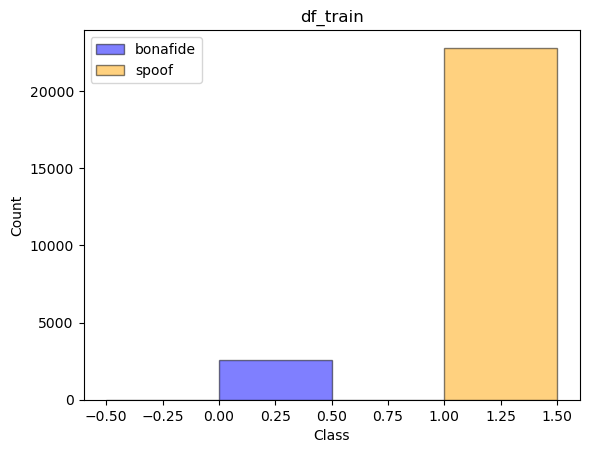

In [9]:
# create separate datasets for each class
df_class0 = df_train[df_train['class'] == 0]
df_class1 = df_train[df_train['class'] == 1]

# plot histograms for each class with different colors
plt.hist(df_class0['class'], bins=2, color='blue', label='bonafide', alpha=0.5, edgecolor='black')
plt.hist(df_class1['class'], bins=2, color='orange', label='spoof', alpha=0.5, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("df_train")
plt.legend()
plt.show()

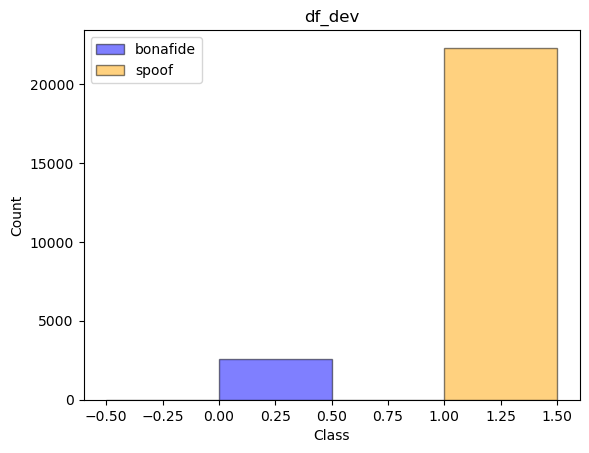

In [10]:
# create separate datasets for each class
df_class0 = df_dev[df_dev['class'] == 0]
df_class1 = df_dev[df_dev['class'] == 1]

# plot histograms for each class with different colors
plt.hist(df_class0['class'], bins=2, color='blue', label='bonafide', alpha=0.5, edgecolor='black')
plt.hist(df_class1['class'], bins=2, color='orange', label='spoof', alpha=0.5, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("df_dev")
plt.legend()
plt.show()

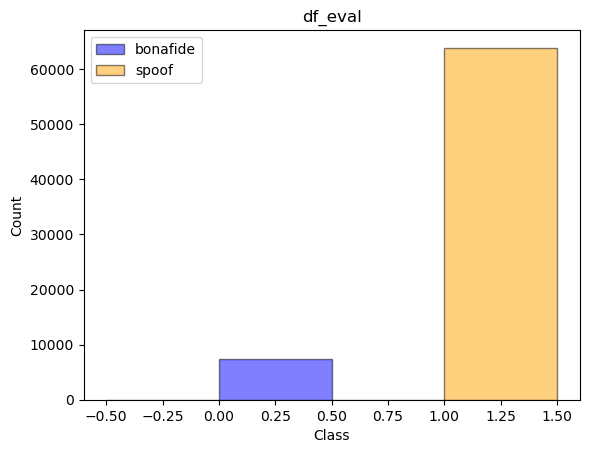

In [11]:
# create separate datasets for each class
df_class0 = df_eval[df_eval['class'] == 0]
df_class1 = df_eval[df_eval['class'] == 1]

# plot histograms for each class with different colors
plt.hist(df_class0['class'], bins=2, color='blue', label='bonafide', alpha=0.5, edgecolor='black')
plt.hist(df_class1['class'], bins=2, color='orange', label='spoof', alpha=0.5, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("df_eval")
plt.legend()
plt.show()

**Task 1.1 (2 points)** Check data distribution. Is it imbalanced? How are you going to deal with it?

Hints: upsampling, downsampling, add new data, e.g. from this [source](https://commonvoice.mozilla.org/) (but will new audios have the same distribution?), or adjust loss functions.

**Answer**

As It was shown above, the dataset is imbalanced. Spoof audio is more than bonafide. Let's balance it using random samples from the bigger class and use all samples from the smaller one.

In [12]:
# for dev and eval, let's simplify the task and use smaller amount of data, but balanced to better understand metrics
# we need this functions, because it removes unuploaded data from our dataframes
def balanced_split(df):
    k = min(len(df[df['class']==0]), len(df[df['class']==1]))
    print(k)
    df_bf = df[df['class']==0].sample(frac=1, random_state=SEED).iloc[0:k]
    df_spoof = df[df['class']==1].sample(frac=1, random_state=SEED).iloc[0:k]

    df_bf = df_bf.append([df_spoof], ignore_index=True)
    df_bf = df_bf.reset_index(drop=True)
    return df_bf

df_eval = balanced_split(df_eval)
df_dev = balanced_split(df_dev)

7355
2548


/tmp/ipykernel_883651/4072736431.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bf = df_bf.append([df_spoof], ignore_index=True)


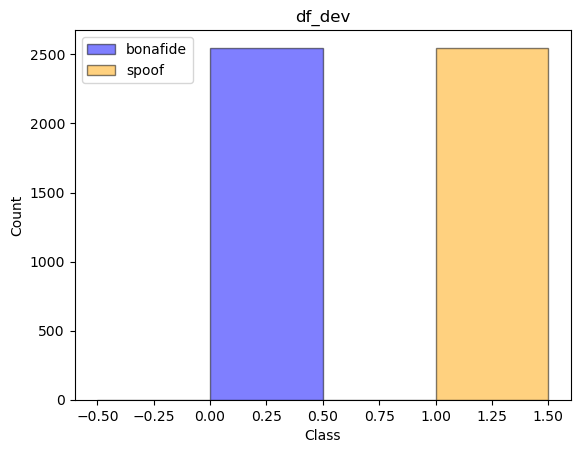

In [13]:
# create separate datasets for each class
df_class0 = df_dev[df_dev['class'] == 0]
df_class1 = df_dev[df_dev['class'] == 1]

# plot histograms for each class with different colors
plt.hist(df_class0['class'], bins=2, color='blue', label='bonafide', alpha=0.5, edgecolor='black')
plt.hist(df_class1['class'], bins=2, color='orange', label='spoof', alpha=0.5, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("df_dev")
plt.legend()
plt.show()

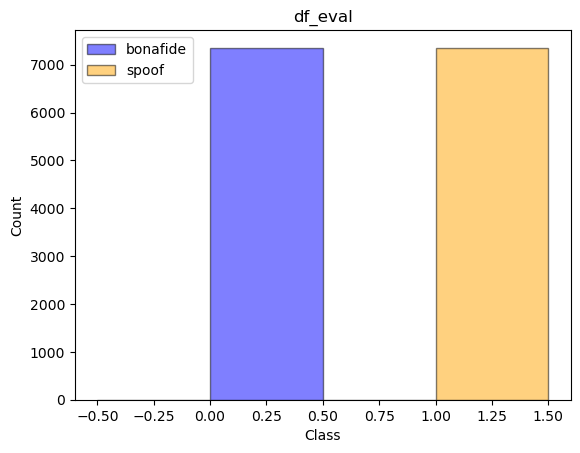

In [14]:
# create separate datasets for each class
df_class0 = df_eval[df_eval['class'] == 0]
df_class1 = df_eval[df_eval['class'] == 1]

# plot histograms for each class with different colors
plt.hist(df_class0['class'], bins=2, color='blue', label='bonafide', alpha=0.5, edgecolor='black')
plt.hist(df_class1['class'], bins=2, color='orange', label='spoof', alpha=0.5, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("df_eval")
plt.legend()
plt.show()

In [15]:
# for audio manipulations we advise you to use torchaudio or librosa
x, sr = torchaudio.load(df_eval["audio_path"].iloc[0])

In [16]:
ipd.display(ipd.Audio(x, rate=sr))

**Task 1.2. (1 point)** Display several spoof and bona-fide audios. Can you hear the difference?

In [17]:
### Your code is here
mask_bonafide = df_train['class'] == 0
mask_spoof = df_train['class'] == 1
audio_bonafide_path = df_train[mask_bonafide].sample()['audio_path'].iloc[0]
audio_spoof_path = df_train[mask_spoof].sample()['audio_path'].iloc[0]

In [18]:
x, sr = torchaudio.load(audio_bonafide_path)
ipd.display(ipd.Audio(x, rate=sr))

In [19]:
x, sr = torchaudio.load(audio_spoof_path)
ipd.display(ipd.Audio(x, rate=sr))

### Custom dataset and Model

You can find inspiration and hints in 
- https://pytorch.org/audio/stable/tutorials/audio_feature_extractions_tutorial.html
- https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
- https://pytorch.org/tutorials/beginner/fgsm_tutorial.html
- https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
- https://pypi.org/project/audiomentations/ 
- https://pytorch.org/audio/stable/tutorials/audio_data_augmentation_tutorial.html
- and any other blogposts about spectrograms

**Task 2.1 (5 points)** We can work with audios as with images, transforming into spectrograms. Here your task is to implement simple model, which receives raw wav (amplitudes, but probably already preprocced in dataset), transforms it into mel-spectrogram, changes amplitude to DB scale (if you want) and then procceses through the layers. You are free to use ready pre-trained backbones, e.g. from `torchvision.models` and fine-tune them. However, if you want to practise more, create something on your own. Large models with `requires_grad=True` for all parameters will probably result in problems on training in colab. 

In [20]:
class WavResNet(nn.Module):
    def __init__(self, classes=None, resample=16000, n_mels=80, melspec_config=None):
        super().__init__()
        
        self.fbank = T.MelSpectrogram(
            sample_rate=resample,
            n_mels=n_mels,
            f_min=0.0,
            f_max=resample/2
        )
        self.to_db = T.AmplitudeToDB()
        
        model = resnet18()
        #TODO change kernel_size
        model.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=64,
            kernel_size=5,
            padding=1,
            bias=False 
        )
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, classes)
        self.network = model
        # or create your own layers and use them in forward pass
        
    
    def forward(self, x, wav_lens: Optional[torch.Tensor]=None):  # can check the length if you want. this is helpful for inference
        mels = self.fbank(x)  # compute the mel spectrogram
        mels_db = self.to_db(mels)  # to decibels
        out = self.network(mels_db) # pass in WavResNet model
        return out

**Task 2.2 (1 point)**
In your opinion, which approach is better for binary classification: 
- Model's last layer output has shape 1, train with BCE-like loss.
- Model's last layer output has shape 2, train with cross-entropy like loss. 

**Task 2.3 (3 points)** Create custom dataset, which recieves ```df``` and returns preprocessed audio.

**Task 2.4 (1 point)** Should we use augmentaions? If yes, which ones? 

In [21]:
class DatasetWav(Dataset):

    def __init__(self, data_frame, padding_sec=4, default_sr=16000, transform=None):
        self.df = data_frame
        self.padding_sec = padding_sec
        self.default_sr = default_sr
        self.labels = data_frame['class'].values.tolist()
        self.paths = data_frame.audio_path.values.tolist()
        self.vad = None   # in this task you are free to ommit it in order to speed up calculations,
                         # also the provided data should be rather clean
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):

        label = self.labels[idx]
        path = self.paths[idx]
        waveform , sr = torchaudio.load(path, normalize=True) # normalize=True
        # transform waveform from stereo to mono channel 
        waveform = waveform.mean(dim=0, keepdim=True) #TODO
        resample_transform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=self.default_sr) # should we use it for our data or can ommit? 
        waveform = resample_transform(waveform)
        # waveform = self.vad(waveform)

        # came up with idea, what to do if audio is longer or shorter than reuqired
        n_samples = self.padding_sec * self.default_sr
        if (waveform.shape[1] < n_samples):
          padding = torch.zeros(1,n_samples - waveform.shape[1])
          waveform = torch.cat([waveform, padding], dim = 1)
          
        else:   
          waveform = waveform[:,:n_samples]
            
        return waveform, torch.tensor(label)

In [22]:
# check that works
batch_size = 10
train_dataset_wavs = DatasetWav(df_train) #.iloc[0:200]
train_dataloader_wavs = DataLoader(train_dataset_wavs, batch_size=batch_size, shuffle=True, num_workers=8)
x, y = next(iter(train_dataloader_wavs))
model = WavResNet(classes=2)
model(x)

tensor([[ 0.5601, -0.1295],
        [ 0.7054, -0.2669],
        [ 0.6614, -0.1785],
        [ 0.4839, -0.0958],
        [ 0.5830, -0.1854],
        [ 0.5515, -0.0166],
        [ 0.5010,  0.0448],
        [ 0.5737, -0.0141],
        [ 0.6996, -0.0988],
        [ 0.5881, -0.2570]], grad_fn=<AddmmBackward>)

### Train and Test functions
**Task 3.0 (1 point)** What is the difference between `model.train()` and `model.eval()`? Does `model.eval()` mode take gradient statisitcs into account?

`model.train()` is used when the model in the training mode. It enables dropout and batch normaliztion.

`model.eval()` is used in the evaluation mode. It disables dropout and batch normalization.

Gradient statistics are not encountered in `eval.mode()`, as the gradients aren't computed during this mode. It takes into account only in `model.train()`.


**Task 3.1 (5 points)** Implement train and test functions, which iterate over all batches. Do logging of loss, accuracy on each batch and after every epoch. Check equal error rate EER, explain, what is it.

In [23]:
def calculate_eer(y, y_score):
  fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)
  eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
  thresh = interp1d(fpr, thresholds)(eer)
  return eer, thresh

In [24]:
def train(model, dataloaders, criterion, optimizer, 
          num_epochs=3, scheduler=None, savename=None,
          print_counter=10, decay_factor=10,
          device=torch.device("cuda")):
    
    accuracy_val = []
    
    train_dataloaders = dataloaders['train']
    val_dataloaders = dataloaders['val']
    
    for epoch in tqdm(range(num_epochs)): # through epochs
        
        model = model.to(device)
        model.train()
        
        loss_tr, acc_tr = [], []
        loss_val, acc_val = [], []
               
        for i, (inputs, labels) in tqdm(enumerate(train_dataloaders)): # through batches
            
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model.forward(inputs)
            
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            scheduler.step()
            
            loss_tr.append(loss.detach().item())
            
            proba = softmax(outputs, 0)[:,1].cpu().detach().numpy()
            labels = labels.cpu().detach().numpy()            
            _, thresh = calculate_eer(labels, proba) # Use function calculate_eer
            predicted = np.where(proba > thresh, 1, 0)

            acc_tr.append(accuracy_score(labels, predicted))
        
            wandb.log(data = {"accuracy per batch": accuracy_score(labels, predicted), "loss per batch": loss.detach().item()})

        train_loss_epoch = np.mean(loss_tr)
        acc_train_epoch = np.mean(acc_tr)
        
        # print(f'[Epoch {epoch + 1} / {num_epochs}], train epoch loss: {train_loss_epoch:.3f}; train epoch acc: {acc_train_epoch:.3f}')
        
        _, _, acc_val, loss_val = test(model=model, test_dataloader=val_dataloaders,
                                        criterion=criterion, device=torch.device("cuda"),
                                        threshold=thresh, epoch=epoch, num_epochs=num_epochs)
        accuracy_val.append(acc_val)
        print(f'[Epoch {epoch + 1} / {num_epochs}], val loss: {loss_val:.3f}; val acc: {acc_val:.2f}')
    
    return model, accuracy_val, thresh
        

def test(model, test_dataloader, criterion=None, device=None, threshold=0.5, epoch=None, num_epochs=None):

    model = model.to(device)
    model.eval()
    
    loss_test, acc_test = [], []
    
    with torch.no_grad():
        for i, (inputs, labels) in tqdm(enumerate(test_dataloader)):

            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            
            loss = criterion(outputs, labels)
            loss_test.append(loss.detach().item())
            
            proba = softmax(outputs, 0)[:,1].cpu().detach().numpy()
            labels = labels.to(device).cpu().numpy()            
            predicted = np.where(proba > threshold, 1, 0)
            
            acc_test.append(accuracy_score(labels, predicted))
            
            accuracy_tes = np.mean(acc_test)
            loss_tes = np.mean(loss_test)
    return labels, outputs, accuracy_tes, loss_tes

### Main loop 

**Task 4.1 (3 points)** What loss will you choose and why? What it should receive for input (logits, probs)? Explain your answer.
Consider also:
- https://medium.com/swlh/focal-loss-what-why-and-how-df6735f26616
- https://libauc.org/


**Task 4.2 (5 points)** Implement main function, which receives yaml or json config (or path to it) and train and test the model, save model checkpoints, and model's test predictions. At least, you should obain results better than random. It is good, if accuracy on test dataset is >= 0.75.

In [25]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=[0,1], y=df_train['class'])
print(class_weights)

[4.91860465 0.55657895]


In [26]:
def main(config):
    lr = 1e-3 
    epochs = 3 
    batch_size = 64 
    wandb.init(project="voice-anti-spoofing", name = "test_run", tags = ["ResNet", "LA"])
    wandb.config = {
      "learning_rate": lr,
      "epochs": epochs,
      "batch_size": batch_size
    }

    
    # debug firstly on small subpart of dataset
    train_dataset_wavs = DatasetWav(df_train) #.iloc[0:200]
    train_dataloader_wavs = DataLoader(train_dataset_wavs, batch_size=batch_size, shuffle=True, num_workers=4)
    
    val_dataset_wavs = DatasetWav(df_dev)
    val_dataloader_wavs = DataLoader(val_dataset_wavs, batch_size=batch_size, shuffle=False, num_workers=4)
    
    test_dataset_wavs = DatasetWav(df_eval)
    test_dataloader_wavs = DataLoader(test_dataset_wavs, batch_size=batch_size, shuffle=False, num_workers=4) 
    
    dataloaders = {"train": train_dataloader_wavs, "val": val_dataloader_wavs}
    
    device = torch.device('cuda')
    classes = 2           
    model = WavResNet(classes = classes)                                                           
    model = model.to(device)
    # freeze layers except the last one if you want
    for param in model.parameters():
        param.requires_grad = False
    model.network.fc.requires_grad_(True)
                                                                                           
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0.01) 
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
    sc = torch.tensor([4.91860465, 0.55657895]).to(device)
    criterion = nn.CrossEntropyLoss(weight=sc)
    # Saving checpoints
    # for_ckpts = config['./content/wandb/chkp']
    
    # os.makedirs(for_ckpts, exist_ok=True)
    
    model, accuracy_val, thresh = train(model=model, dataloaders=dataloaders, criterion=criterion, optimizer=optimizer, num_epochs=epochs,
                                        scheduler=scheduler, device=device)#, savename = './content/wandb/chkp/checkpoint.pth')
    y, probs, accuracy_test, loss_test = test(model=model, test_dataloader=test_dataloader_wavs, criterion=criterion, device=device, threshold=thresh)
    print(f'Test accuracy: {accuracy_test}; Test loss: {loss_test}')
    wandb.finish()
    return y, probs

y, probs = main('/home/nikolay_kalm/EDA_OCR/DL/wandb/latest-run/files/config.yaml')

  0%|          | 0/3 [00:00<?, ?it/s]/home/nikolay_kalm/anaconda3/envs/torch39/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/home/nikolay_kalm/anaconda3/envs/torch39/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/home/nikolay_kalm/anaconda3/envs/torch39/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
397it [00:20, 18.92it/s]
80it [00:03, 20.11it/s]
 33%|███▎      | 1/3 [00:25<00:50, 25.42s/it]

[Epoch 1 / 3], val loss: 0.687; val acc: 0.50


397it [00:21, 18.86it/s]
80it [00:03, 20.12it/s]
 67%|██████▋   | 2/3 [00:50<00:25, 25.44s/it]

[Epoch 2 / 3], val loss: 0.688; val acc: 0.50


397it [00:20, 19.08it/s]
80it [00:03, 20.10it/s]
100%|██████████| 3/3 [01:16<00:00, 25.35s/it]

[Epoch 3 / 3], val loss: 0.688; val acc: 0.50



230it [00:10, 21.36it/s]

Test accuracy: 0.49966032608695654; Test loss: 0.6839190882185231


accuracy per batch,▃▄▅▆▅▆▃▅▃▆▃▃▂▄▅▃▃▃█▅▂▆▃▂▄▄▄▄▁▅▄▅▃▆▄▇▃▆▅▄
loss per batch,▆▅▆▄▃▃▇▁▆▃▃▆▆▅▅█▇▅▂▄█▂▇▆▃▄▃▆▃█▇▇▄▆▇▂▂▇▅▅
accuracy per batch,0.47222
loss per batch,0.71715


Training might require a long time. So, you can try to use subpart of the dataset to receive rather good results. Also, you don't have to train for many epochs, 1 or even a half of epoch might be enough. Also consider to make some speedups in the model and dataset.

Colab also might work unstable with lots of data. If this happens, think how to deal with it, e.g. restart the kernel and/or remove the majority of data from Drive and try to bugfix firstly, then do train and test separately. 



**Task 4.3 (5 points)** Analyze the results. Play some audios with wrong predictions. Plot prediction distributions vs class. Is it possible to find better threshold?

**Task 4.4 (5 points)** Discuss the results and your approaches + hyperparameters. If you can, run some experiments with different parameters.

 Write your ideas, what else you can try to improve the results in the future.

**Task 4.5 (3 points)** Provide link to wandb project, or link to report. Upload best model's weights to Drive and provide a link with access right.


https://wandb.ai/nickcalmykow281/voice-anti-spoofing/runs/49yxrb89

**Bonus task. (50 points)** 

So far, we didn't care about speaker_id and verification. Take verification model from whatever you want and create counter measure subnetwork, as described in this [article](https://sasv-challenge.github.io/pdfs/2022_descriptions/IDVoice.pdf). Train the model, as described there. ASVspoof also provides Enrollment(anchor) recordings. Try to make blending, to obtain better metrics for counter measures.

These links might be helpful:
- https://github.com/archinetai/surgeon-pytorch
- https://www.kaggle.com/code/peter0749/additive-margin-softmax-loss-with-visualization

## Problem 3. (30 pts)

### Task 1 (10 pts)

For FCNN (Fully connected Neural Networks)
\begin{equation}
f(x)=f_k\left(f_{k-1}\left(\ldots\left(f_0(x)\right)\right),\right.
\end{equation}
assume the nonlinearity function $\sigma$ is ReLU and loss function $L$ is squared error loss function.
Prove that the deep learning model is not unique for any datasets, i.e. the optimization problem 
\begin{equation}
\min_\theta \ g(\theta)=\frac{1}{N} \sum_{i=1}^N L\left(y_i, \hat{y}_i\right), \text{where} \ \ \hat{y}_i=f\left(x_i, \theta\right),
\end{equation} 
dose not have an unique global minimizer $\theta$.

**Answer:**

Let's assume FCNN with one hidden layer and ReLU activation function (two neurons in each layer):

$$f(x)=w_2\sigma(w_1x+b_1)+b_2$$

dataset is two points:

$$(x_1, y_1), (x_2, y_2)$$

such that $y_1=y_2=0, x_1>x_2$.

Let's select two different $\theta$ that will give the same prediction for dataset, but have different $g(\theta)$. 

$$w_1 = [1, -1], w_2 = [0, 0], b_1 = [0,0]^T, b_2 = 0$$

$$w_1 = [-1, 1], w_2 = [0, 0], b_1 = [1,-1]^T, b_2 = 0$$

For this $\theta$, we have: $\hat{y}_1 = \hat{y}_2 = 0$, and $g(\theta) = 0$.

Another case:

$$w_1 = [-1, 1], w_2 = [0, 0], b_1 = [1,-1]^T, b_2 = 0$$

$$w_1 = [-1, 1], w_2 = [0, 0], b_1 = [1,-1]^T, b_2 = 0$$


We have $\hat{y}_1 = \hat{y}_2 = 0$, but $g(\theta) = \frac{1}{2}(1-0)^2 + \frac{1}{2}(-1-0)^2 = 1$.

There are two sets of weights and biases, that give the same prediction, but have different $g(\theta)$.

### Task 2 (5 pts)

The *softmax* activation function is 
\begin{equation}
\mathrm{Softmax}(\mathbf{z})_i=\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} \ \text { for } \  i=1, \ldots, K \text { and } \mathbf{z}=\left(z_1, \ldots, z_K\right) \in \mathbb{R}^K.
\end{equation}
Suppose $\mathbf{z} \in \mathbb{R}^K$, and $\mathbf{a} \in \mathbb{R}^K$,
Prove that for the optimization problem
\begin{equation}
\begin{aligned}
& \min_{\mathbf{a}} \ -\langle\mathbf{a}, \mathbf{z}\rangle+\langle\mathbf{a}, \log \mathbf{a}\rangle \\
& \text { s.t. } \sum_k^K \mathbf{a}_{k}=1,
\end{aligned}
\end{equation}
the minimizer is 
\begin{equation}
\mathbf{a}^*=\mathrm{Softmax}(\mathbf{z}).
\end{equation}

*Hint*: KKT optimality conditions and convexiy of the problem can help you to show the required equality

**Anwer**

We have this objective function:

\begin{equation}
-\langle\mathbf{a}, \mathbf{z}\rangle+\langle\mathbf{a}, \log \mathbf{a}\rangle = -\sum_{k=1}^K a_k z_k + \sum_{k=1}^K a_k \log a_k
\end{equation}

Taking the derivative with respect to $a_i$ gives:

\begin{equation}
\frac{\partial}{\partial a_i} \left(-\sum_{k=1}^K a_k z_k + \sum_{k=1}^K a_k \log a_k\right) = -z_i + \log a_i + 1 + \lambda
\end{equation}

where $\lambda$ is the Lagrange multiplier for the constraint $\sum_k^K \mathbf{a}_{k}=1$. Setting this equal to zero and solving for $a_i$ gives:

\begin{equation}
a_i = e^{z_i - 1 - \log \sum_{k=1}^K e^{z_k}}
\end{equation}

which is exactly the softmax function. Therefore, $\mathbf{a}^*=\mathrm{Softmax}(\mathbf{z})$ is the minimizer of the optimization problem.

### Task 3 (15 pts)

For function $f(x)=x^2, x \in \left[0, 1\right]$, 

1) prove that the neural network $\hat f(x)$ based on the following structure has the approximation error 
\begin{equation}
|f(x)-\hat f(x)|\leq \frac{1}{2^{n-1}}
\end{equation}
where $n$ is the number of layers in the neural network.

![](neural_parabola.png)

*Hint*: For each $ x \in \left[0, 1\right]$, $x$ can be denoted by its binary expansion $x=\sum_{i=0}^{∞} x_i/2^i$, where $x_i \in \{ 0, 1\}$. The above structure can be used to find $x_0,\dots, x_n$. Then we can write $\hat f(x)=f\left(\sum_{i=0}^{∞} x_i/2^i\right).$

After the proof, if we want to achieve $\epsilon$ appoximation error based on the above neural network, the number of layers $n$ has to satisfy the condition $\frac{1}{2^{n-1}}\leq \epsilon$, i.e. $n\geq \log_2 \frac{1}{\epsilon}$.

2) Implement this neural network in any framework you like with different $n$ (for example $n = 3, 5, 10, 15$), and then plot the curve for absolute errors for different $n$. Compare the obtained plots with theoretical bound.


Let $x \in [0,1]$ be a real number with binary expansion $x = \sum_{i=0}^{\infty} x_i/2^i$, where $x_i \in {0,1}$. Let $\hat{x}$ be the binary expansion obtained by applying the neural network shown in the diagram. Then, we have:

\begin{align*}
\hat{x}_0 &= \max(0,x_0-1/2), \
\hat{x}_1 &= \max(0,x_1-1/2)\max(0,1-x_0), \
\hat{x}_2 &= \max(0,x_2-1/2)\max(0,1-x_0)\max(0,1-x_1) ...
\end{align*}

and $\hat{x}_i = 0$ for $i>n$. Let $\hat{f}(x) = f(\hat{x}) = \hat{x}^2$. Then, we have:

\begin{align*}
|f(x) - \hat{f}(x)| &= |x^2 - \hat{x}^2| \
&= \left|\sum_{i=0}^{\infty} \frac{x_i^2 - \hat{x}i^2}{2^i}\right| \
&= \left|\sum{i=0}^{n-1} \frac{x_i^2 - \hat{x}i^2}{2^i}\right| \
&\leq \sum{i=0}^{n-1} \frac{|x_i^2 - \hat{x}i^2|}{2^i} \
&= \sum{i=0}^{n-1} \frac{x_i \hat{x}i}{2^i} \
&\leq \sum{i=0}^{n-1} \frac{1}{2^{i+1}} \
&= \frac{1}{2^n} \left(1 + \frac{1}{2} + \frac{1}{4} + \cdots + \frac{1}{2^{n-1}}\right) \
&= \frac{1}{2^n} \frac{1-1/2^n}{1-1/2} \
&= \frac{1}{2^{n-1}}.
\end{align*}

Therefore, we have shown that $|f(x) - \hat{f}(x)| \leq \frac{1}{2^{n-1}}$ for any $x \in [0,1]$. To achieve an approximation error of $\epsilon$, we need to choose $n$ such that $\frac{1}{2^{n-1}} \leq \epsilon$, which gives $n \geq \log_2 \frac{1}{\epsilon}$.

In [ ]:
# Your solution is here
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

key = random.PRNGKey(0)

def f(x):
    return x**2

def binary(x, n):
    binary_list = [int((x * 2**i) % 2) for i in range(n)]
    return jnp.array(binary_list)

def binary_to_float(x):
    return jnp.sum(x * 0.5**jnp.arange(len(x)))

def neural_network(x, n):
    x_bin = binary(x, n)
    w = jnp.array([2**(-i-1) for i in range(n)])
    y = jnp.sum(w * x_bin)
    return f(y)

# Compute the absolute error for different values of n
eps = 0.001
n_values = [3, 5, 10, 15]
for n in n_values:
    max_error = 2**(-n+1)
    xs = jnp.linspace(0, 1, 1000)
    absolute_errors = jnp.abs(f(xs) - neural_network(xs, n))
    max_absolute_error = jnp.max(absolute_errors)
    print(f"n={n}: max absolute error = {max_absolute_error:.5f} (theoretical bound = {max_error:.5f})")